# F1 Fastest Race Lap Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import kagglehub

quali_path = kagglehub.dataset_download(
    "rohanrao/formula-1-world-championship-1950-2020",
    path='qualifying.csv'
)
races_path = kagglehub.dataset_download(
    "rohanrao/formula-1-world-championship-1950-2020",
    path='races.csv'
)
results_path = kagglehub.dataset_download(
    "rohanrao/formula-1-world-championship-1950-2020",
    path='results.csv'
)

print("Path to dataset files:", races_path, quali_path, results_path, sep='\n')

Path to dataset files:
/home/sofi/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24/races.csv
/home/sofi/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24/qualifying.csv
/home/sofi/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24/results.csv


## Dataframe Creation

In [3]:
quali = pd.read_csv(
    quali_path,
    index_col='qualifyId',
    na_values='\\N'
)
quali.head(5)

,raceId,driverId,constructorId,number,position,q1,q2,q3
qualifyId,,,,,,,,
1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [4]:
races = pd.read_csv(
    races_path,
    index_col='raceId',
    parse_dates=['date'],
    na_values='\\N'
)
races.head(5)

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
race_results = pd.read_csv(
    results_path,
    index_col='resultId',
    na_values='\\N'
)
race_results.head(5)

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


## 2024 Season Data

In [6]:
races_2024 = races.loc[races['year'] == 2024]
races_2024.head(5)

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1121,2024,1,3,Bahrain Grand Prix,2024-03-02,15:00:00,https://en.wikipedia.org/wiki/2024_Bahrain_Gra...,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,NaN,NaN
1122,2024,2,77,Saudi Arabian Grand Prix,2024-03-09,17:00:00,https://en.wikipedia.org/wiki/2024_Saudi_Arabi...,2024-03-07,13:30:00,2024-03-07,17:00:00,2024-03-08,13:30:00,2024-03-08,17:00:00,NaN,NaN
1123,2024,3,1,Australian Grand Prix,2024-03-24,04:00:00,https://en.wikipedia.org/wiki/2024_Australian_...,2024-03-22,01:30:00,2024-03-22,05:00:00,2024-03-23,01:30:00,2024-03-23,05:00:00,NaN,NaN
1124,2024,4,22,Japanese Grand Prix,2024-04-07,05:00:00,https://en.wikipedia.org/wiki/2024_Japanese_Gr...,2024-04-05,02:30:00,2024-04-05,06:00:00,2024-04-06,02:30:00,2024-04-06,06:00:00,NaN,NaN
1125,2024,5,17,Chinese Grand Prix,2024-04-21,07:00:00,https://en.wikipedia.org/wiki/2024_Chinese_Gra...,2024-04-19,03:30:00,2024-04-19,07:30:00,NaN,NaN,2024-04-20,07:00:00,2024-04-20,03:00:00


In [7]:
quali_2024 = quali.loc[quali['raceId'].isin(races_2024.index)]
quali_2024.head(5)

,raceId,driverId,constructorId,number,position,q1,q2,q3
qualifyId,,,,,,,,
10073,1121,830,9,1,1,1:30.031,1:29.374,1:29.179
10074,1121,844,6,16,2,1:30.243,1:29.165,1:29.407
10075,1121,847,131,63,3,1:30.350,1:29.922,1:29.485
10076,1121,832,6,55,4,1:29.909,1:29.573,1:29.507
10077,1121,815,9,11,5,1:30.221,1:29.932,1:29.537


In [8]:
race_results_2024 = race_results.loc[race_results['raceId'].isin(races_2024.index)]
race_results_2024.head(5)

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
26286,1121,830,9,1.0,1,1.0,1,1,26.0,57,1:31:44.742,5504742.0,39.0,1.0,1:32.608,210.383,1
26287,1121,815,9,11.0,5,2.0,2,2,18.0,57,+22.457,5527199.0,40.0,4.0,1:34.364,206.468,1
26288,1121,832,6,55.0,4,3.0,3,3,15.0,57,+25.110,5529852.0,44.0,6.0,1:34.507,206.156,1
26289,1121,844,6,16.0,2,4.0,4,4,12.0,57,+39.669,5544411.0,36.0,2.0,1:34.090,207.069,1
26290,1121,847,131,63.0,3,5.0,5,5,10.0,57,+46.788,5551530.0,40.0,12.0,1:35.065,204.946,1


In [9]:
def lap_time_to_seconds(time):
    if pd.isna(time):
        return np.nan
    minutes, seconds = time.split(':')
    return int(minutes) * 60 + float(seconds)

In [10]:
data = pd.merge(race_results_2024, quali_2024, on=['raceId', 'driverId'], suffixes=('_race', '_quali'))

data = data[['q1', 'q2', 'q3', 'fastestLapTime']]

for col in data.columns:
    data[col] = data[col].apply(lap_time_to_seconds)

data = data.dropna(subset='fastestLapTime')
data = data.dropna(subset=['q1', 'q2', 'q3'], how='all')

data['bestQualiTime'] = data.drop(columns='fastestLapTime').min(axis=1, skipna=True)

# Dataset Analysis

In [11]:
data.mean()

q1                85.721982
q2                84.741564
q3                84.420837
fastestLapTime    88.568147
bestQualiTime     85.031413
dtype: float64

In [12]:
data.quantile([0.25, 0.5, 0.75])

,q1,q2,q3,fastestLapTime,bestQualiTime
0.25,77.1275,76.3025,75.980,80.933,76.3095
0.50,88.1770,86.3070,84.484,88.748,86.0300
0.75,91.3760,90.2105,89.841,96.334,91.1220


In [13]:
data.corr()

,q1,q2,q3,fastestLapTime,bestQualiTime
q1,1.000000,0.995761,0.989067,0.939229,0.995271
q2,0.995761,1.000000,0.994503,0.953145,0.999608
q3,0.989067,0.994503,1.000000,0.956087,0.995292
fastestLapTime,0.939229,0.953145,0.956087,1.000000,0.949713
bestQualiTime,0.995271,0.999608,0.995292,0.949713,1.000000


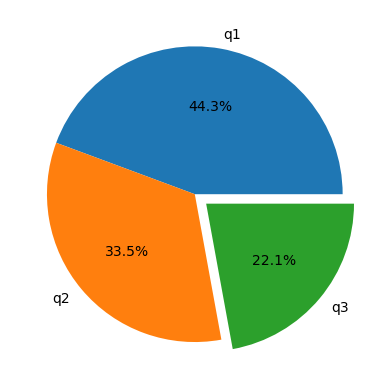

In [14]:
plt.pie(
    data[['q1', 'q2', 'q3']].count(),
    labels=['q1', 'q2', 'q3'],
    autopct='%1.1f%%',
    explode=(0, 0, 0.1)
);

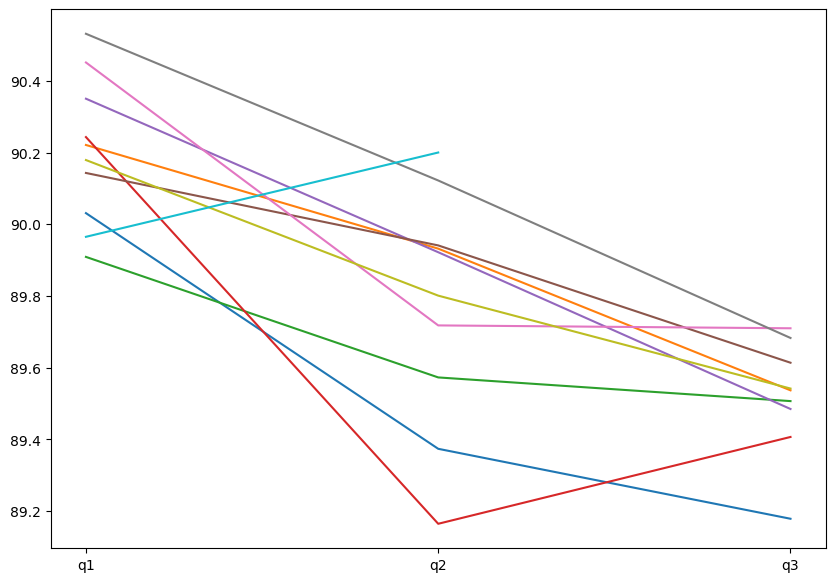

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(data[['q1', 'q2', 'q3']].head(10).T);

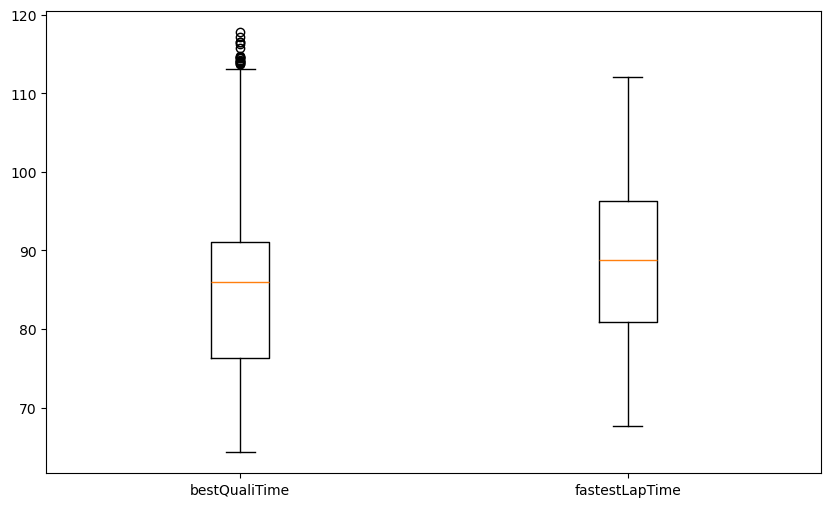

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(data[['bestQualiTime', 'fastestLapTime']], tick_labels=['bestQualiTime', 'fastestLapTime']);

# Model Training and Validation

In [21]:
def plot_model_on_data(X, y, model=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        line_x = np.linspace(xlim[0], xlim[1], 100)
        line_x_df = pd.DataFrame(line_x[:, None], columns=X.columns)
        line_y = model.predict(line_x_df)
        plt.plot(line_x, line_y, c="red", lw=3)
        plt.xlim(xlim); plt.ylim(ylim)
    plt.grid()
    plt.xlabel('Best Quali Lap (sec)')
    plt.ylabel('Fastest Race Lap (sec)');

In [18]:
X = data[['bestQualiTime']]
y = data['fastestLapTime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
model.score(X_test, y_test)

MAE: 1.653833313480941


0.9185897274216752

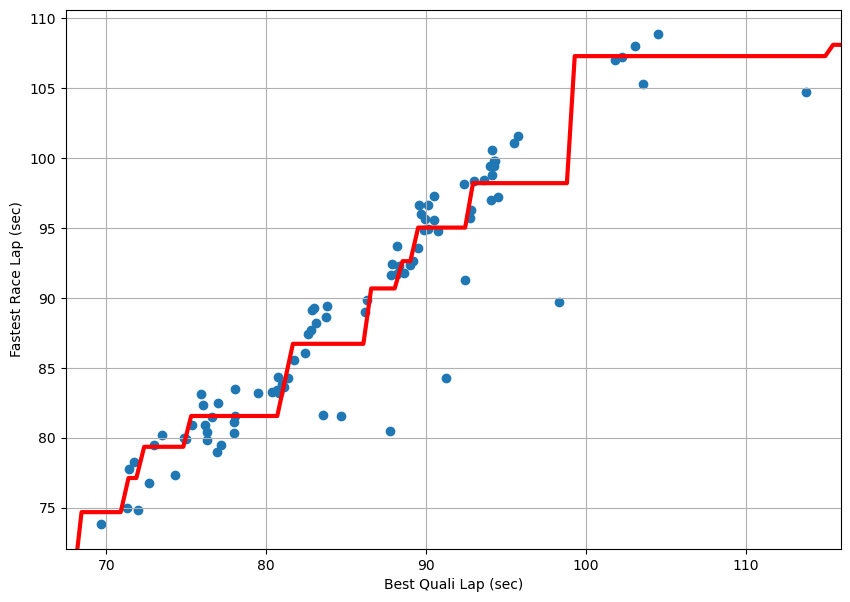

In [22]:
plot_model_on_data(X_test, y_test, model)